In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import re

In [2]:
df = pd.read_json('/home/ashish/VScode files/Python files/projects/ML project/Loan-Approval-ML-project/notebook/data/loan_approval_dataset.json')

In [3]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [5]:
df.shape

(252000, 13)

In [6]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [12]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].apply(lambda x: re.sub('[^a-zA-Z]', '', str(x)))

In [13]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanicalengineer,Rewa,MadhyaPradesh,3,13,0
1,2,7574516,40,10,single,rented,no,SoftwareDeveloper,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technicalwriter,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,SoftwareDeveloper,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civilservant,Tiruchirappalli,TamilNadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,WestBengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Armyofficer,Rewa,MadhyaPradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,DesignEngineer,KalyanDombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,GraphicDesigner,Pondicherry,Puducherry,0,10,0


In [19]:
df['CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'NorthDumdum', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'Al

In [22]:
df_count =df[['Married/Single']].value_counts()
df_count

Married/Single
single            226272
married            25728
Name: count, dtype: int64

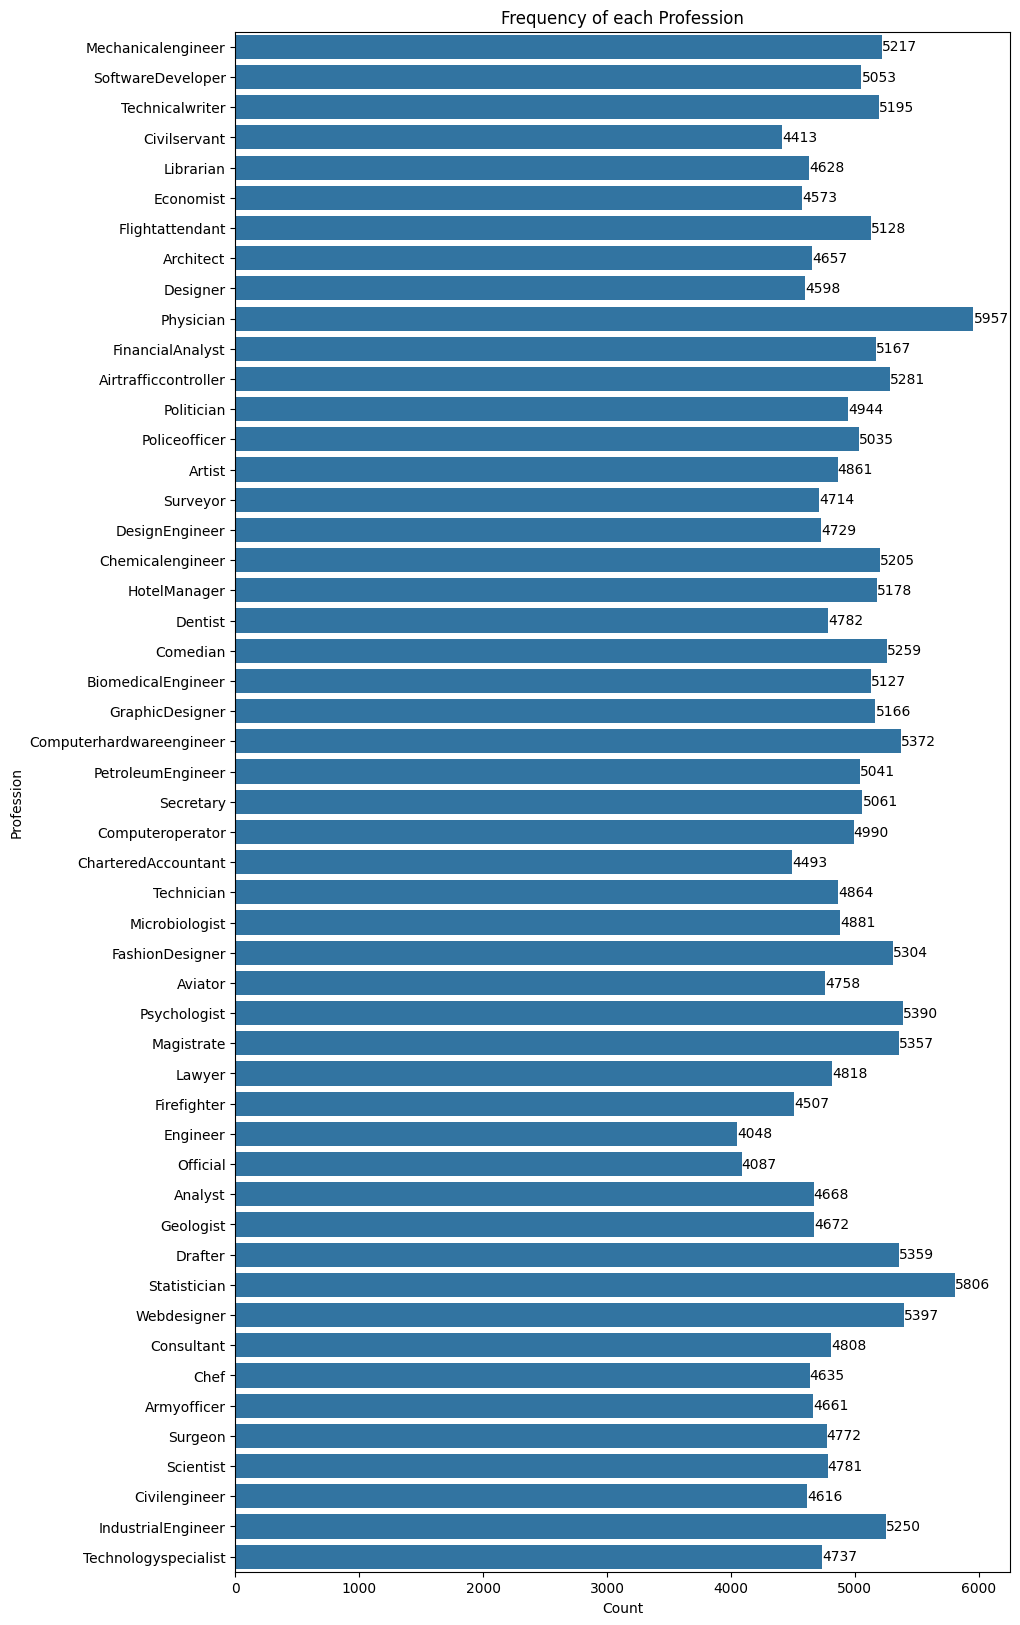

In [20]:
plt.figure(figsize=(10, 20))

ax = sns.countplot(y=df['Profession'])

plt.title("Frequency of each Profession")
plt.ylabel("Profession")
plt.xlabel("Count")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

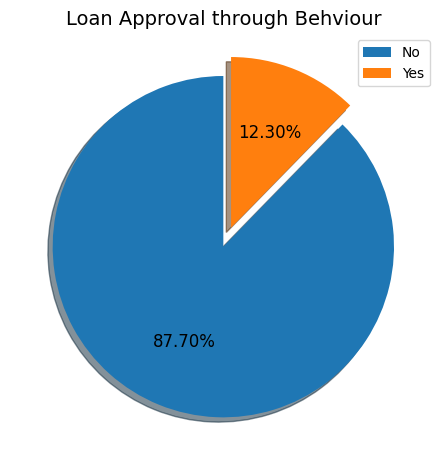

In [24]:
loany=df['Risk_Flag'].replace({0:'No' ,1:'Yes'}).value_counts()

plt.pie(loany.values, labels=loany.index,
        
        startangle=90, autopct="%1.2f%%",
        labeldistance=None, textprops={'fontsize': 12}, shadow=True, explode=[0, 0.12])
plt.legend()
plt.title('Loan Approval through Behviour', fontsize=14)

plt.tight_layout()
plt.show()

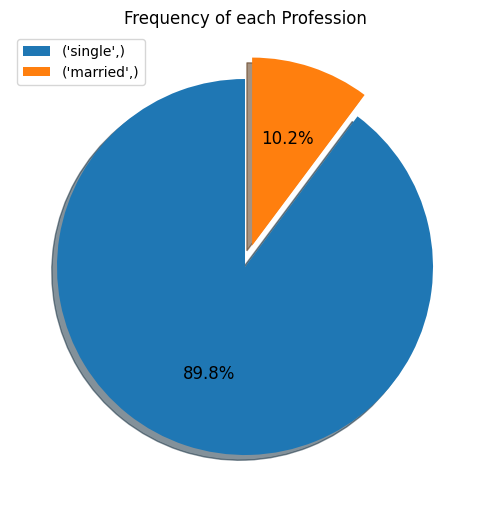

In [25]:
plt.figure(figsize=(5, 5))
plt.pie(df_count, labels=df_count.index, autopct='%1.1f%%', startangle=90,
        labeldistance=None, textprops={'fontsize': 12}, shadow=True, explode=[0, 0.12])
plt.tight_layout()
plt.legend()

plt.title('Frequency of each Profession')

plt.show()

In [26]:
df_Age =df[['Age']].value_counts()
df_Age

Age
27     5197
66     5092
48     4967
33     4921
41     4827
45     4806
54     4785
68     4772
35     4643
50     4624
69     4617
76     4585
55     4563
25     4543
72     4533
79     4505
60     4504
59     4498
53     4490
47     4483
30     4468
78     4455
22     4430
34     4414
57     4394
58     4368
56     4344
24     4326
23     4322
62     4311
31     4257
70     4251
61     4235
40     4233
43     4206
21     4205
49     4203
26     4156
37     4153
71     4150
42     4134
64     4132
29     4109
67     3995
65     3969
74     3954
63     3942
77     3916
28     3901
32     3834
75     3829
39     3800
38     3793
46     3627
44     3622
73     3569
36     3444
51     3397
52     3197
Name: count, dtype: int64

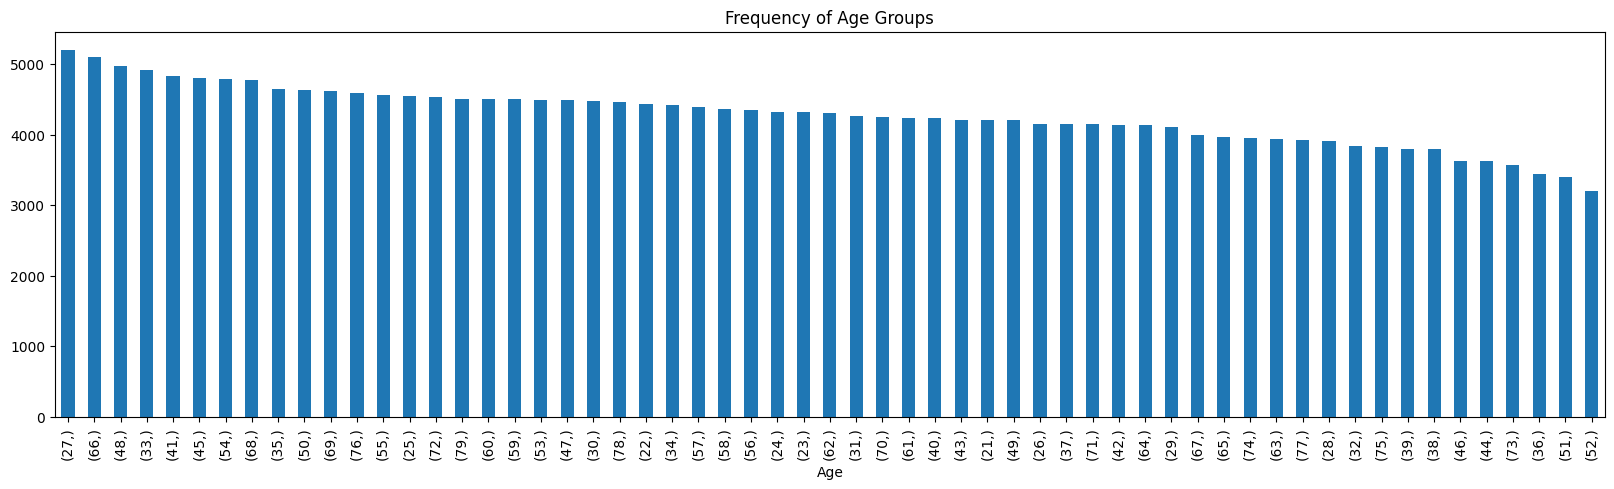

In [33]:
plt.figure(figsize = (20,5))
df_Age.plot(kind ='bar')
plt.title('Frequency of Age Groups')

plt.show()

In [40]:
df_CITY =df[['CITY']].value_counts().head(60)
df_CITY

CITY                      
Aurangabad                    1543
Vijayanagaram                 1259
Bhopal                        1208
Bulandshahr                   1185
Saharsa                       1180
Vijayawada                    1172
Srinagar                      1136
Indore                        1130
NewDelhi                      1098
Hajipur                       1098
Satara                        1096
NaviMumbai                    1084
Jorhat                        1079
Ongole                        1067
Bellary                       1065
Erode                         1064
Giridih                       1064
Hospet                        1058
Jodhpur                       1056
Khammam                       1051
Danapur                       1037
Bareilly                      1036
Kolkata                       1033
Bidhannagar                   1033
Satna                         1028
Mango                         1016
Howrah                        1016
Agra                        

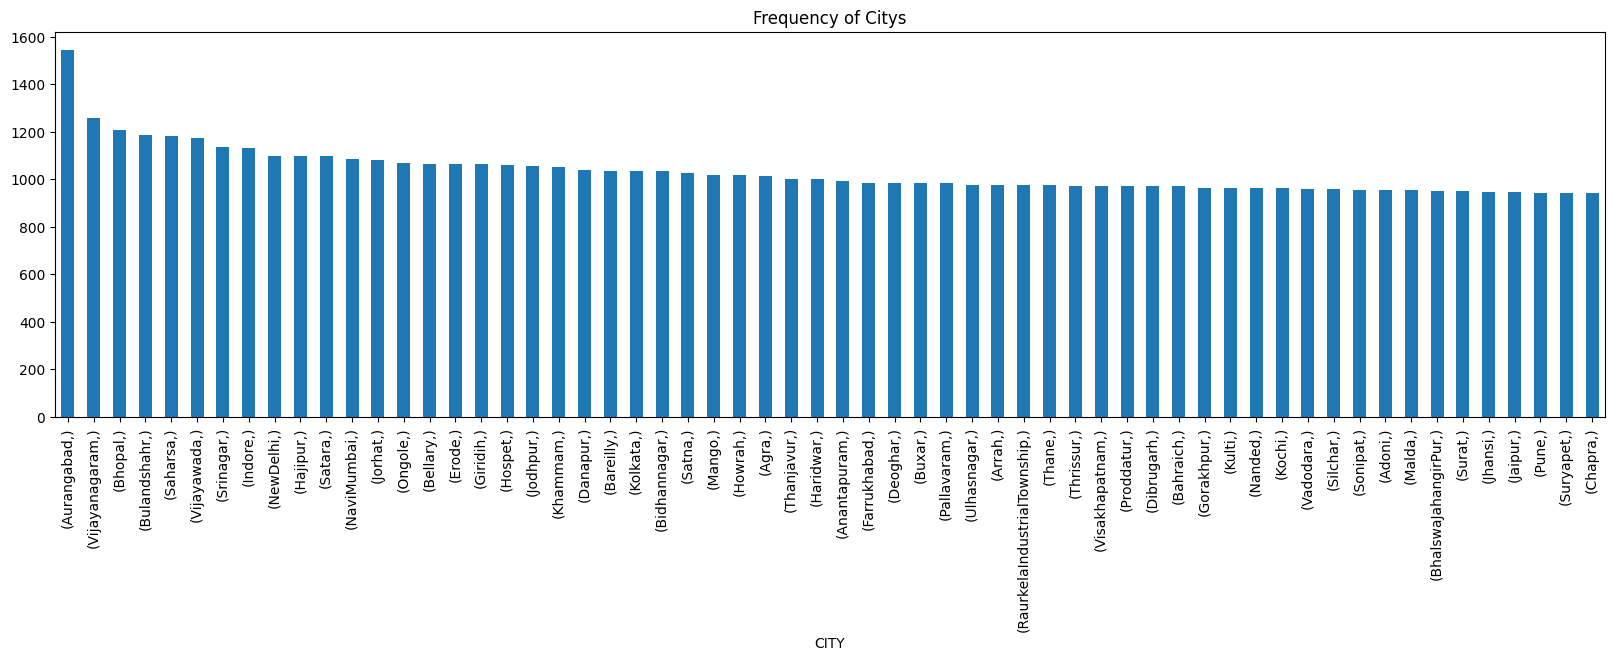

In [41]:
plt.figure(figsize = (20,5))
df_CITY.plot(kind ='bar')
plt.title('Frequency of Citys')

plt.show()

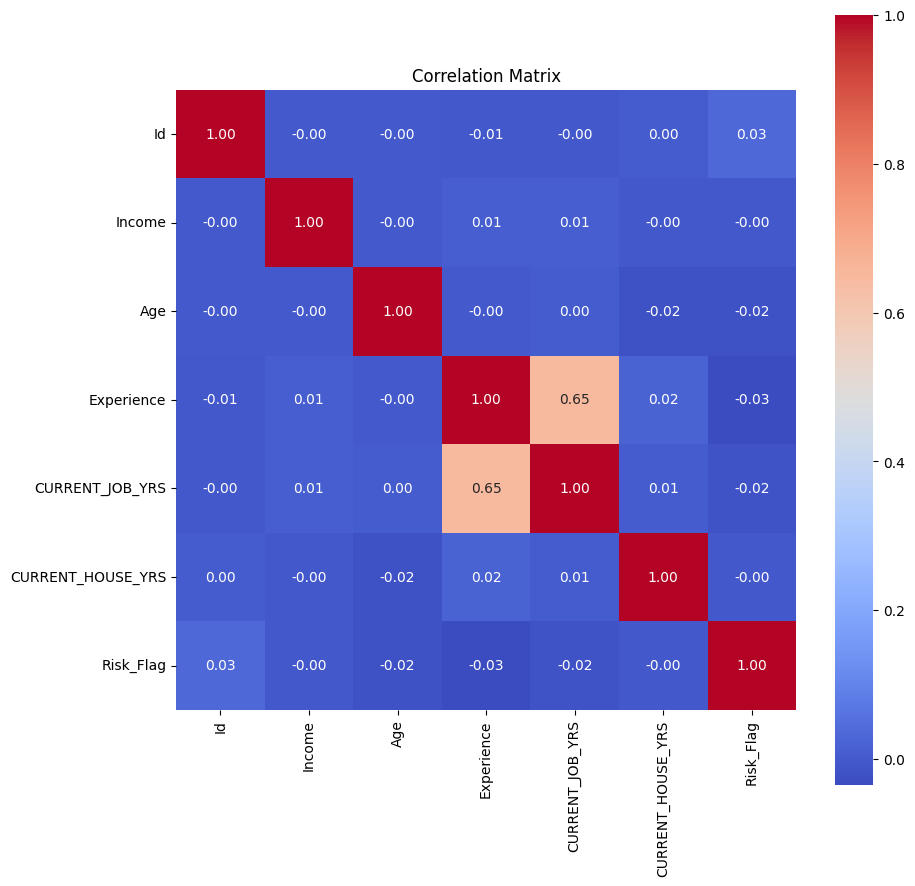

In [43]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()